In [1]:
import pandas as pd
import matplotlib as plt
import numpy as np
import matplotlib.pyplot as plt

from cdindicatorFn import check_year_columns, group_sort, question_us_overall, datavalue_type_filter, plot_graph_dict_red, change_plot_color
   


In [2]:
#reads in the csv file for Cancer
cancer_df = pd.read_csv('Cancer.csv', low_memory=False)


In [3]:
#checks to see if columns YearEnd and YearStart have the same value: prints statement and creates new column YearDiffernce if necessary
cancer_df = check_year_columns(cancer_df)

The 'YearStart' and 'YearEnd' columns do not have the same values in all rows.


In [4]:
#groups data frames by YearEnd and Question, then sorts the data frame by YearENd least to greatest
cancer_df = group_sort(cancer_df)

In [5]:
cancer_df['Question'].value_counts()

Question
Invasive cancer (all sites combined), incidence                                         9642
Invasive cancer (all sites combined), mortality                                         9537
Cancer of the lung and bronchus, incidence                                              9117
Cancer of the colon and rectum (colorectal), incidence                                  8982
Cancer of the lung and bronchus, mortality                                              8757
Cancer of the colon and rectum (colorectal), mortality                                  8049
Invasive cancer of the oral cavity or pharynx, incidence                                8040
Invasive cancer of the female breast, incidence                                         7995
Invasive cancer of the prostate, incidence                                              7863
Invasive melanoma, incidence                                                            7197
Cancer of the oral cavity and pharynx, mortality             

In [6]:

#creates a dictionary of dataframes that are seperated by question and filtered to US and overall stratification category
# Does not include dataframes that don't include data that can be filtered to US and/or overall
cancer_us_overall = question_us_overall(cancer_df)

In [7]:
# filters each dataframe in the dictionary to the desired Datavalue type
cancer_us_overall = datavalue_type_filter(cancer_us_overall)

In [8]:
cancer_df['Question'].value_counts()

Question
Invasive cancer (all sites combined), incidence                                         9642
Invasive cancer (all sites combined), mortality                                         9537
Cancer of the lung and bronchus, incidence                                              9117
Cancer of the colon and rectum (colorectal), incidence                                  8982
Cancer of the lung and bronchus, mortality                                              8757
Cancer of the colon and rectum (colorectal), mortality                                  8049
Invasive cancer of the oral cavity or pharynx, incidence                                8040
Invasive cancer of the female breast, incidence                                         7995
Invasive cancer of the prostate, incidence                                              7863
Invasive melanoma, incidence                                                            7197
Cancer of the oral cavity and pharynx, mortality             

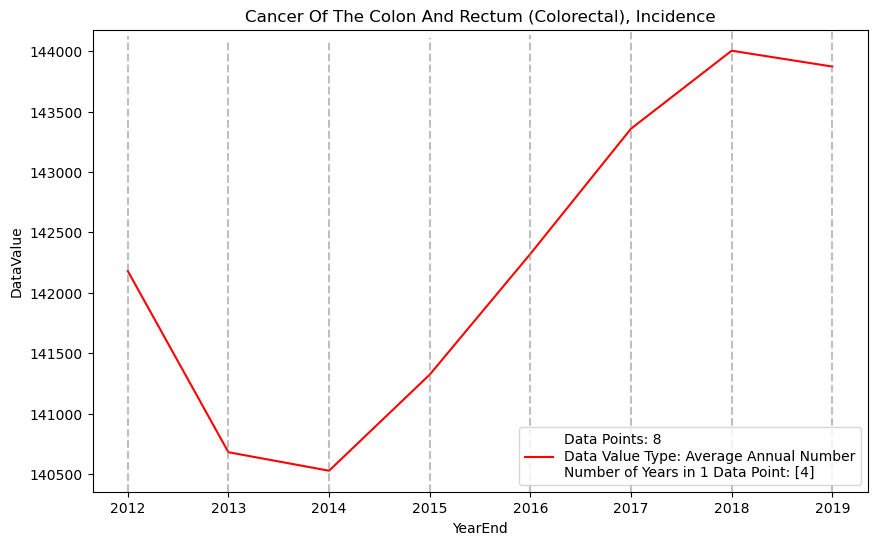

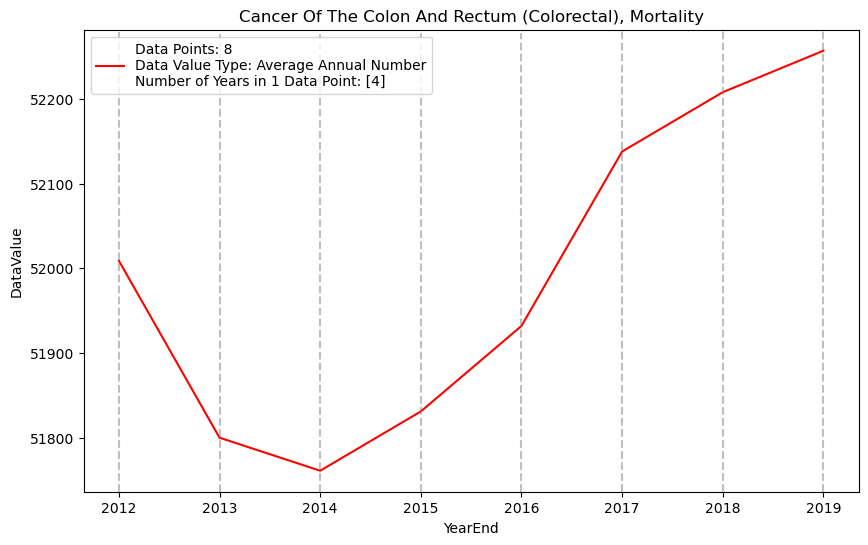

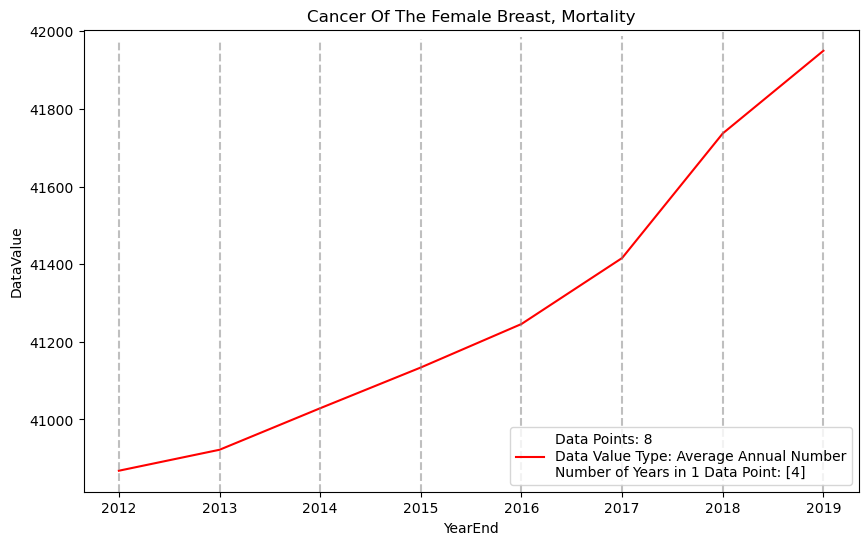

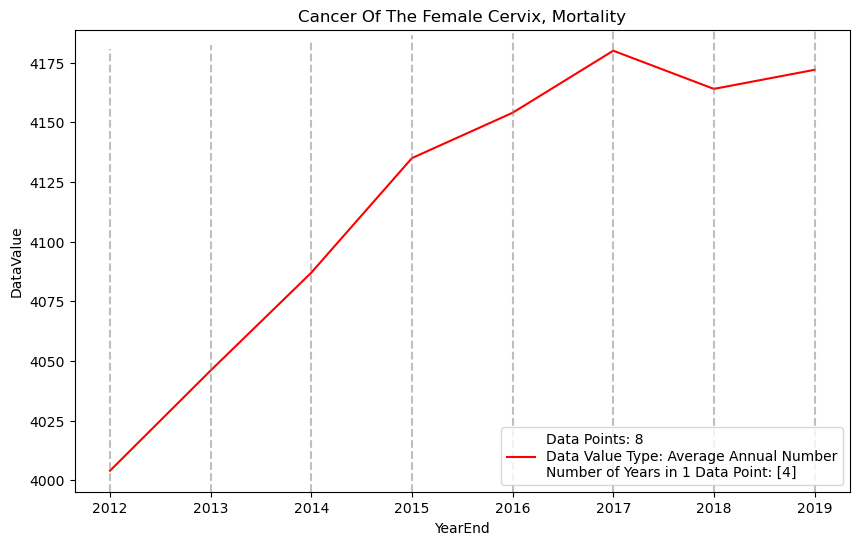

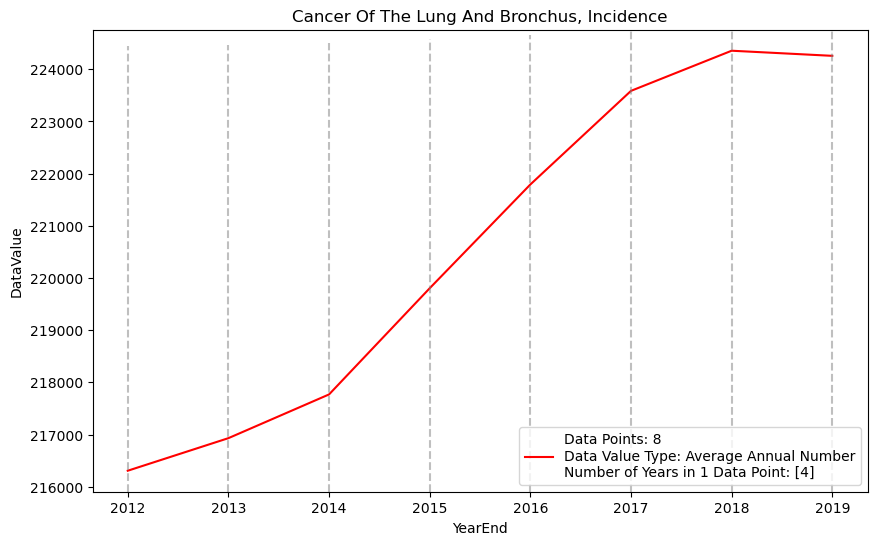

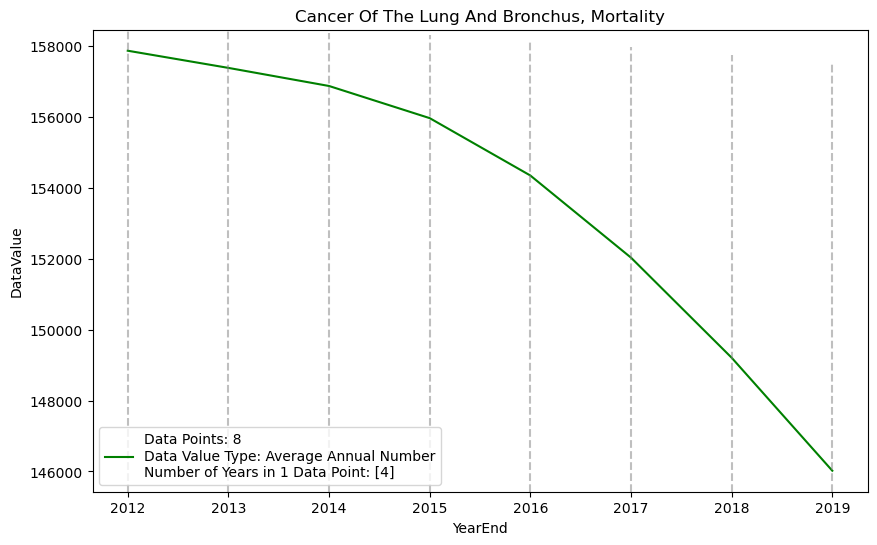

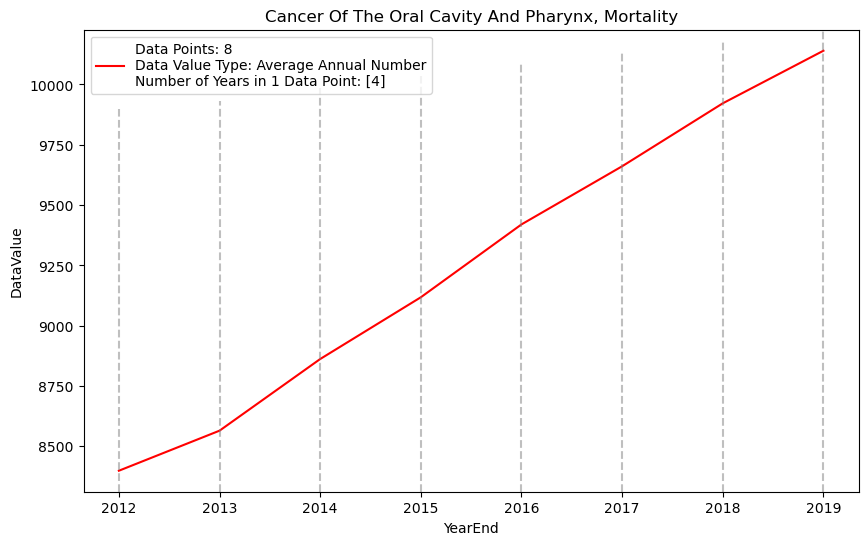

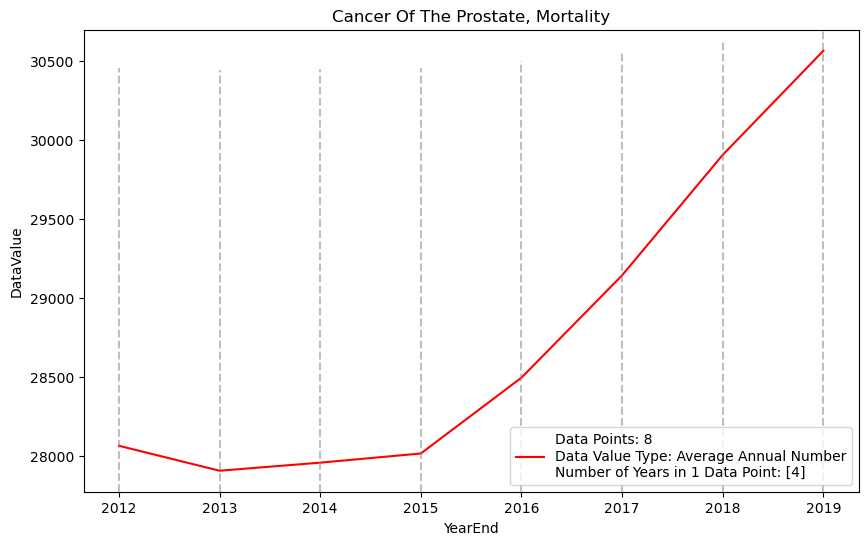

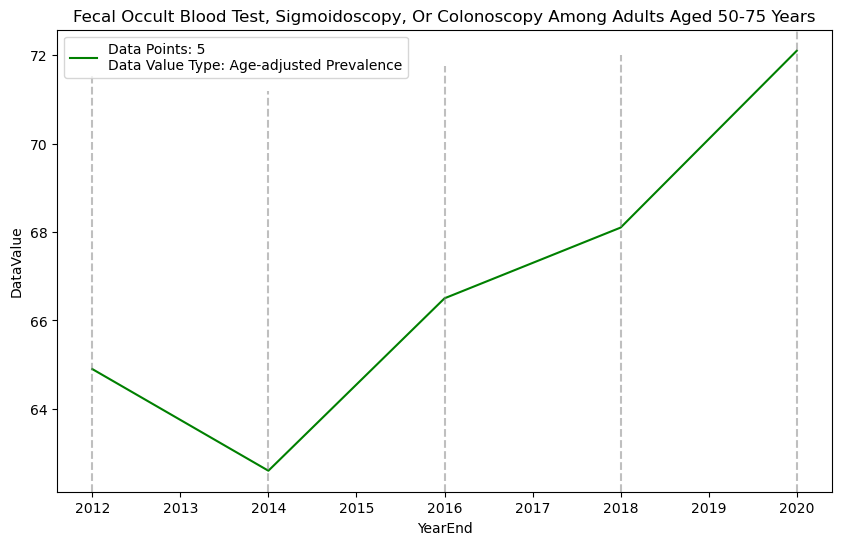

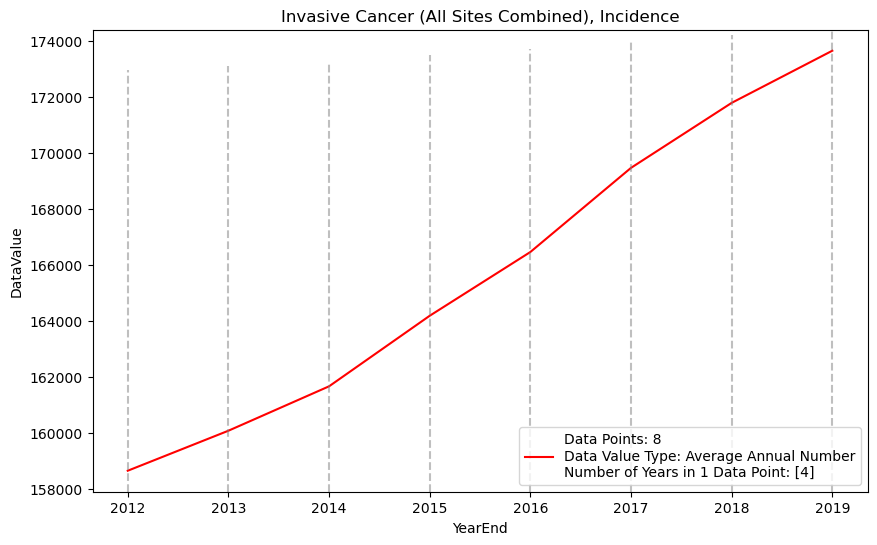

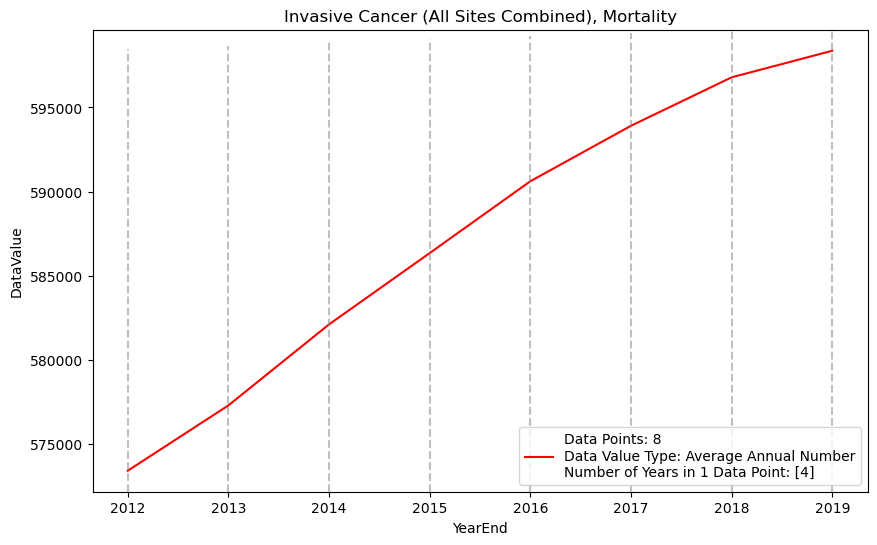

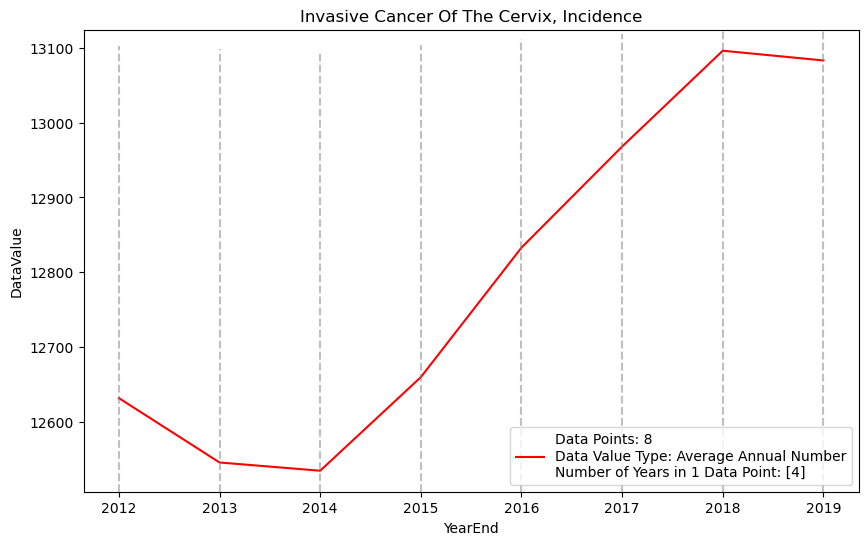

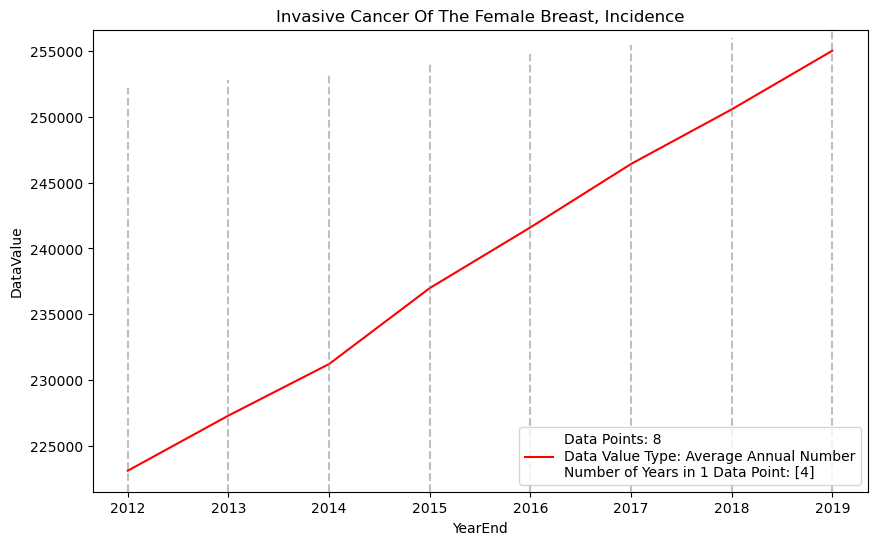

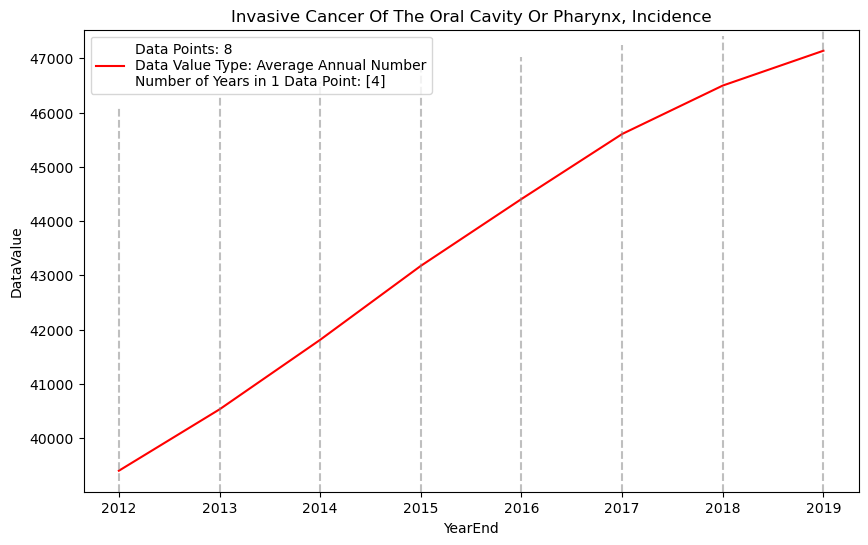

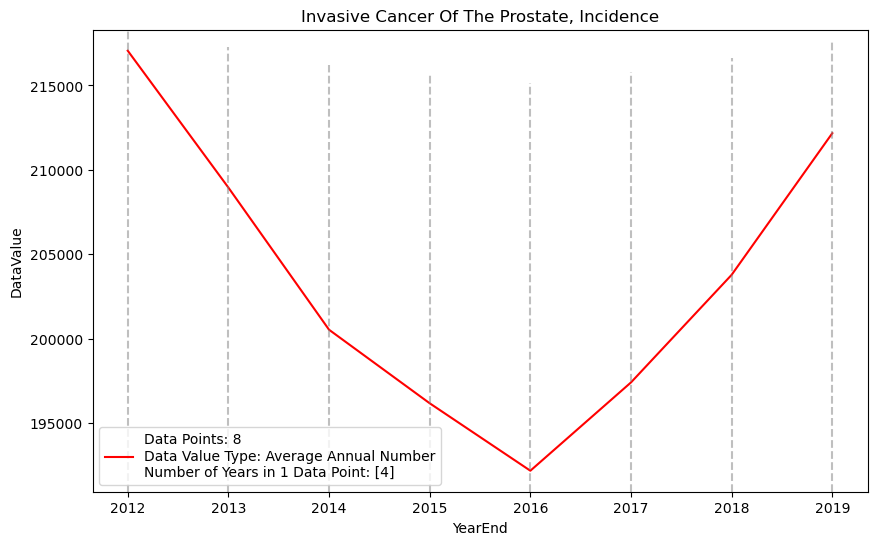

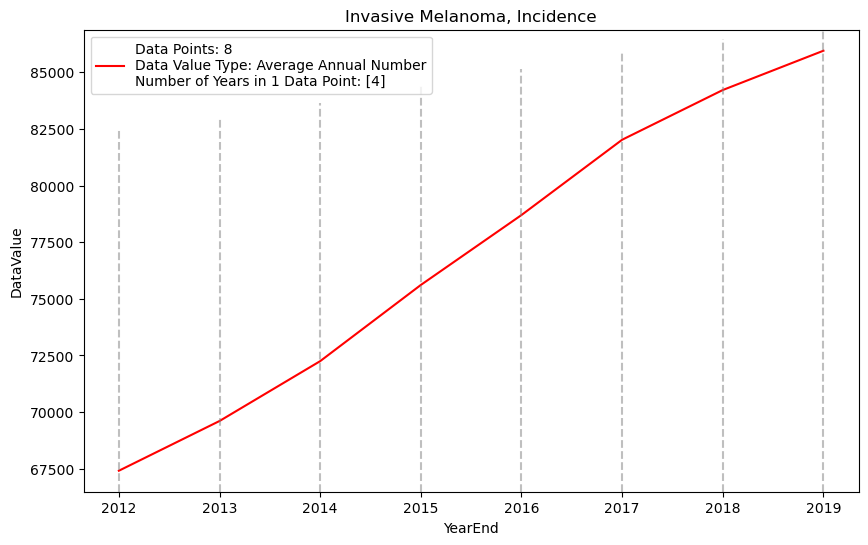

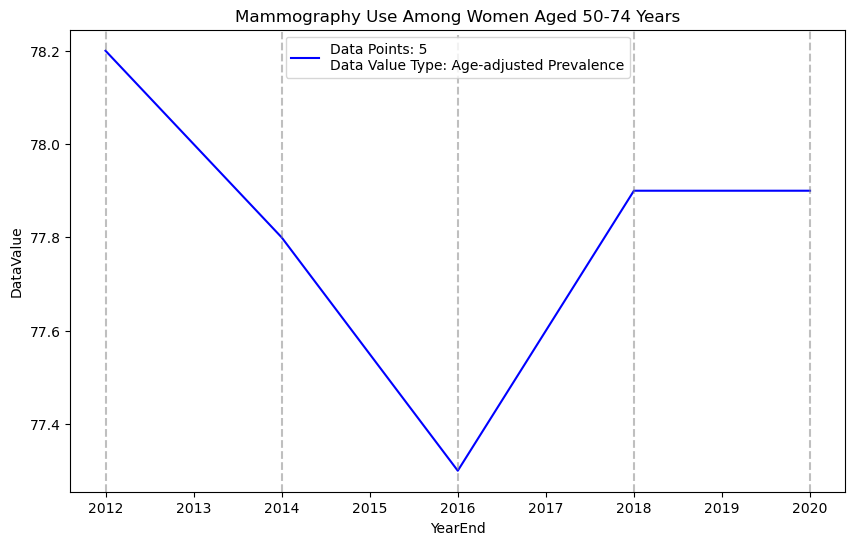

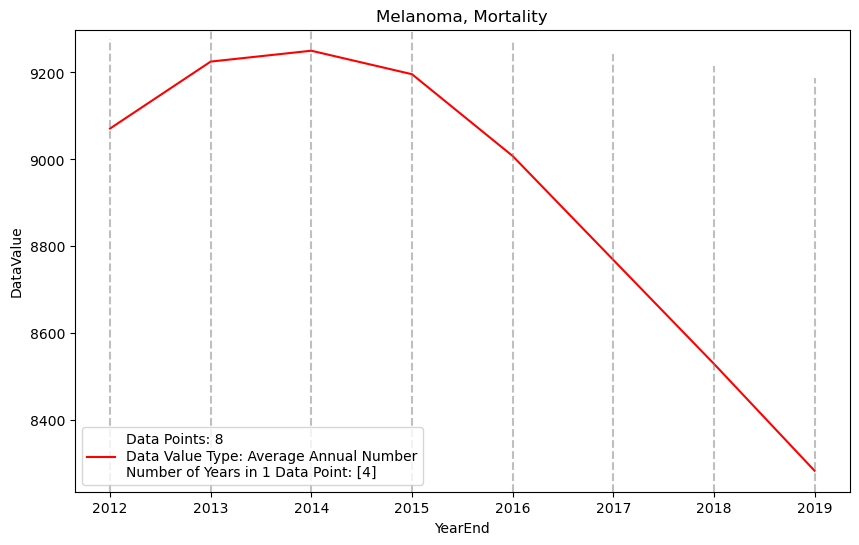

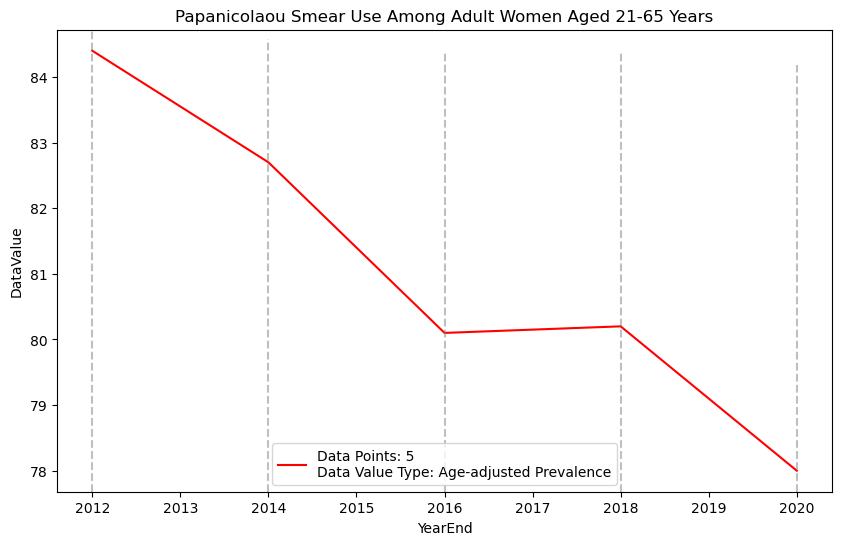

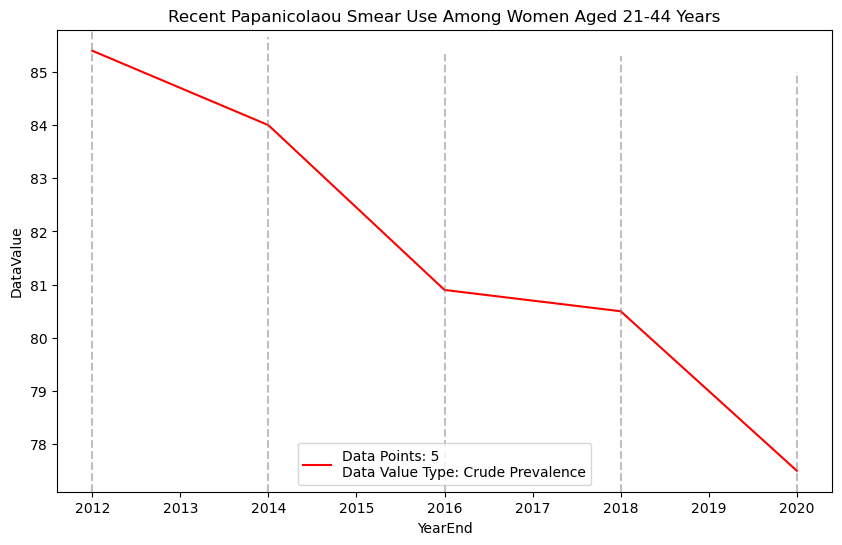

In [9]:
#plots each data frame in the dictionary separatley and colors them red, then stores them in a new dictionary graphs
cancer_graphs = plot_graph_dict_red(cancer_us_overall)



cancer_lung_bronchus_mortality = cancer_graphs['Cancer of the lung and bronchus, mortality']
change_plot_color(cancer_lung_bronchus_mortality, color = 'green')

fecal_occult_blood_test_sigmoidoscopy_colonoscopy_aged50_75 = cancer_graphs['Fecal occult blood test, sigmoidoscopy, or colonoscopy among adults aged 50-75 years']
change_plot_color(fecal_occult_blood_test_sigmoidoscopy_colonoscopy_aged50_75, color = 'green')

mammography_women_aged_50_74 = cancer_graphs['Mammography use among women aged 50-74 years']
change_plot_color(mammography_women_aged_50_74, color = 'blue')


# <center>DATA EXPLORATION<center>

In [10]:
#have to see if the works and might need to add to the functions py file. the result I am looking for is to get all the columns with multiple years
#so that i can correctly label the x axis

different_years = cancer_df[cancer_df['YearStart'] != cancer_df['YearEnd']]
# same_years_df = cancer_df[cancer_df['YearStart'] == cancer_df['YearEnd']]
# same_year_ignore = same_years_df['Question'].unique().tolist()

questions = different_years['Question'].unique().tolist()
#creating an empty dictionary to store dataframes with their own unique questions
dfs = {}
#looping through our grouped dataframe to create multiple dataframes containing only one question along with its values and then storing them in a dictionary
# also sets their key values to the target question in their respective dataframes
for question in questions:
    df_name = question
    dfs[df_name] = cancer_df.loc[cancer_df['Question'] == question]\
        .loc[cancer_df['LocationAbbr'] == 'US']\
        .loc[cancer_df['StratificationCategory1'] == 'Overall']





different_years.loc[different_years['Question'] == 'Cancer of the female breast, mortality'].loc[different_years['LocationAbbr'] == 'US']\
        .loc[different_years['StratificationCategory1'] == 'Overall']

,YearStart,YearEnd,LocationAbbr,Topic,Question,DataValue,DataValueUnit,DataValueType,DatavalueFootnote,LowConfidenceLimit,HighConfidenceLimit,StratificationCategory1,Stratification1,YearDifference
2564,2008,2012,US,Cancer,"Cancer of the female breast, mortality",40868.0,NaN,Average Annual Number,NaN,NaN,NaN,Overall,Overall,4
2848,2008,2012,US,Cancer,"Cancer of the female breast, mortality",26.0,"per 100,000",Average Annual Crude Rate,NaN,25.9,26.1,Overall,Overall,4
2849,2008,2012,US,Cancer,"Cancer of the female breast, mortality",21.9,"per 100,000",Average Annual Age-adjusted Rate,NaN,21.8,22.0,Overall,Overall,4
18972,2009,2013,US,Cancer,"Cancer of the female breast, mortality",21.5,"per 100,000",Average Annual Age-adjusted Rate,NaN,21.4,21.6,Overall,Overall,4
19500,2009,2013,US,Cancer,"Cancer of the female breast, mortality",40922.0,NaN,Average Annual Number,NaN,NaN,NaN,Overall,Overall,4
19613,2009,2013,US,Cancer,"Cancer of the female breast, mortality",25.9,"per 100,000",Average Annual Crude Rate,NaN,25.7,26.0,Overall,Overall,4
34113,2010,2014,US,Cancer,"Cancer of the female breast, mortality",25.7,"per 100,000",Average Annual Crude Rate,NaN,25.6,25.8,Overall,Overall,4
34574,2010,2014,US,Cancer,"Cancer of the female breast, mortality",21.2,"per 100,000",Average Annual Age-adjusted Rate,NaN,21.1,21.3,Overall,Overall,4
34810,2010,2014,US,Cancer,"Cancer of the female breast, mortality",41029.0,NaN,Average Annual Number,NaN,NaN,NaN,Overall,Overall,4
51028,2011,2015,US,Cancer,"Cancer of the female breast, mortality",41134.0,NaN,Average Annual Number,NaN,NaN,NaN,Overall,Overall,4


In [11]:
cancer_df['Question'].value_counts()

Question
Invasive cancer (all sites combined), incidence                                         9642
Invasive cancer (all sites combined), mortality                                         9537
Cancer of the lung and bronchus, incidence                                              9117
Cancer of the colon and rectum (colorectal), incidence                                  8982
Cancer of the lung and bronchus, mortality                                              8757
Cancer of the colon and rectum (colorectal), mortality                                  8049
Invasive cancer of the oral cavity or pharynx, incidence                                8040
Invasive cancer of the female breast, incidence                                         7995
Invasive cancer of the prostate, incidence                                              7863
Invasive melanoma, incidence                                                            7197
Cancer of the oral cavity and pharynx, mortality             

In [12]:
cancer_df['Question'].value_counts()

Question
Invasive cancer (all sites combined), incidence                                         9642
Invasive cancer (all sites combined), mortality                                         9537
Cancer of the lung and bronchus, incidence                                              9117
Cancer of the colon and rectum (colorectal), incidence                                  8982
Cancer of the lung and bronchus, mortality                                              8757
Cancer of the colon and rectum (colorectal), mortality                                  8049
Invasive cancer of the oral cavity or pharynx, incidence                                8040
Invasive cancer of the female breast, incidence                                         7995
Invasive cancer of the prostate, incidence                                              7863
Invasive melanoma, incidence                                                            7197
Cancer of the oral cavity and pharynx, mortality             

In [13]:
#The question is can we turn this into a function to apply to other csvs???

##creates a list with all the target valus in the Questions column
questions = cancer_df['Question'].unique().tolist()
#creating an empty dictionary to store dataframes with their own unique questions
dfs = {}
#looping through our grouped dataframe to create multiple dataframes containing only one question along with its values and then storing them in a dictionary
# also sets their key values to the target question in their respective dataframes
for question in questions:
    df_name = question
    dfs[df_name] = cancer_df.loc[cancer_df['Question'] == question]\
        .loc[cancer_df['LocationAbbr'] == 'US']\
        .loc[cancer_df['StratificationCategory1'] == 'Overall']

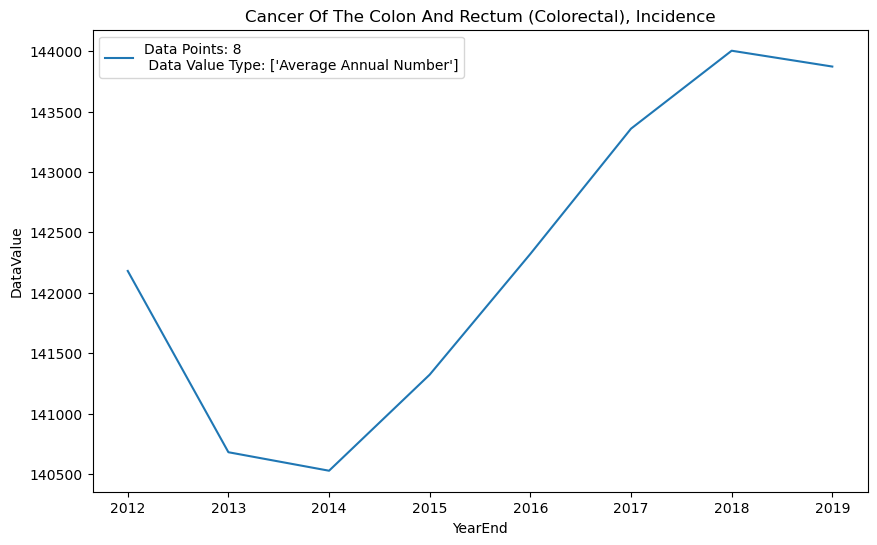

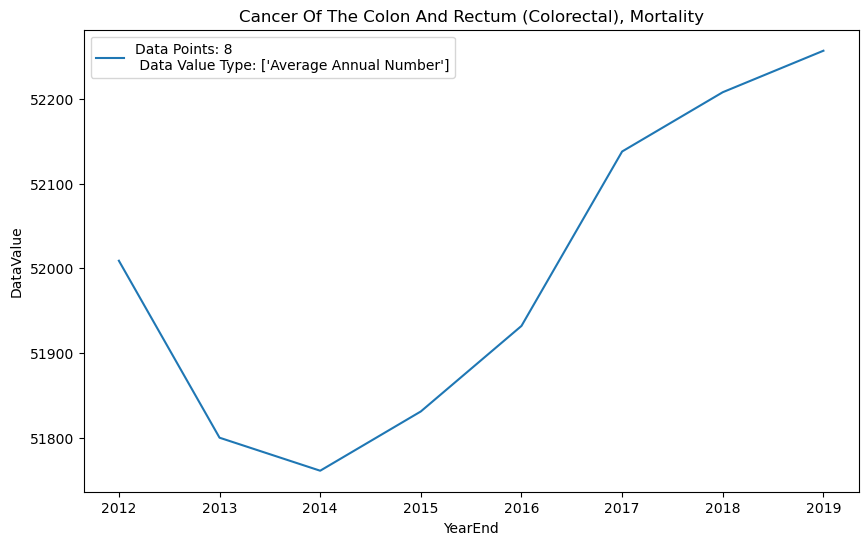

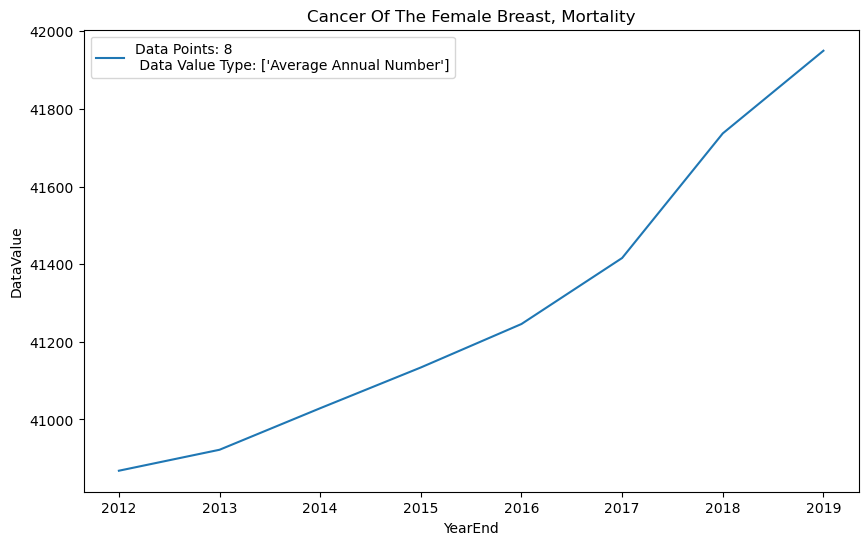

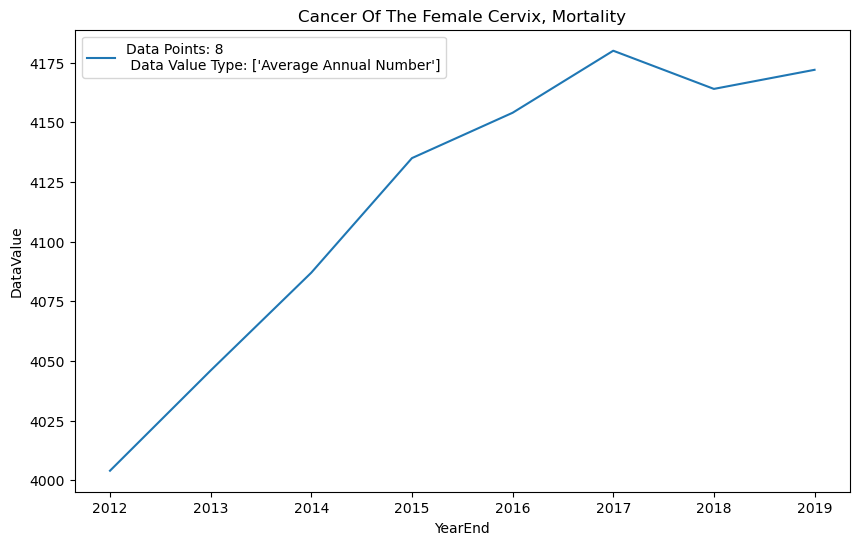

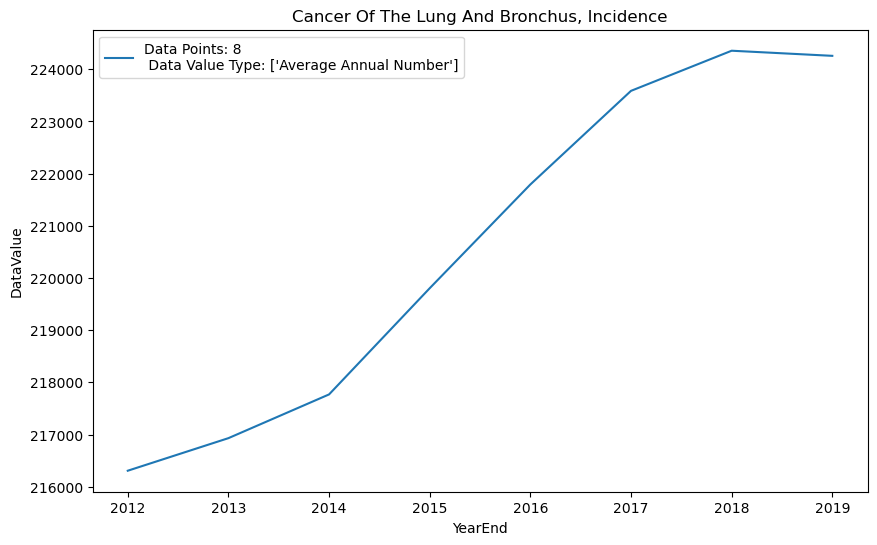

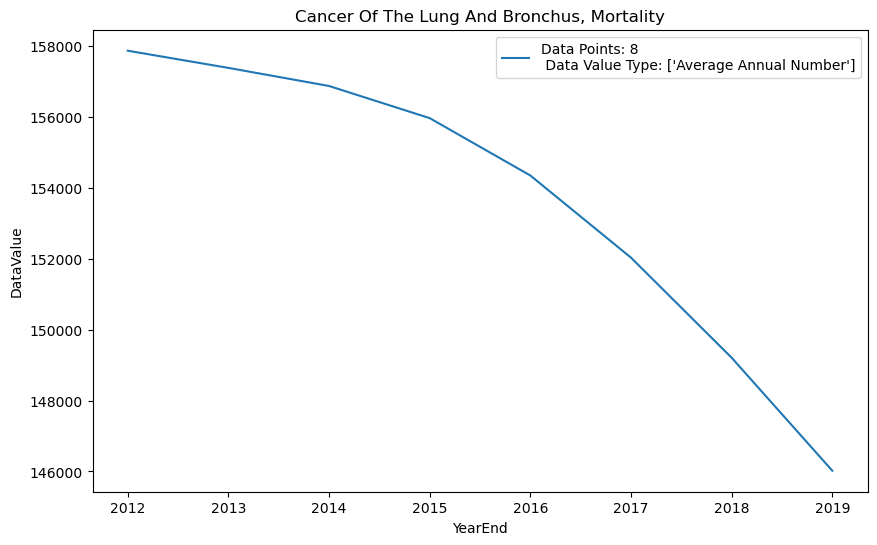

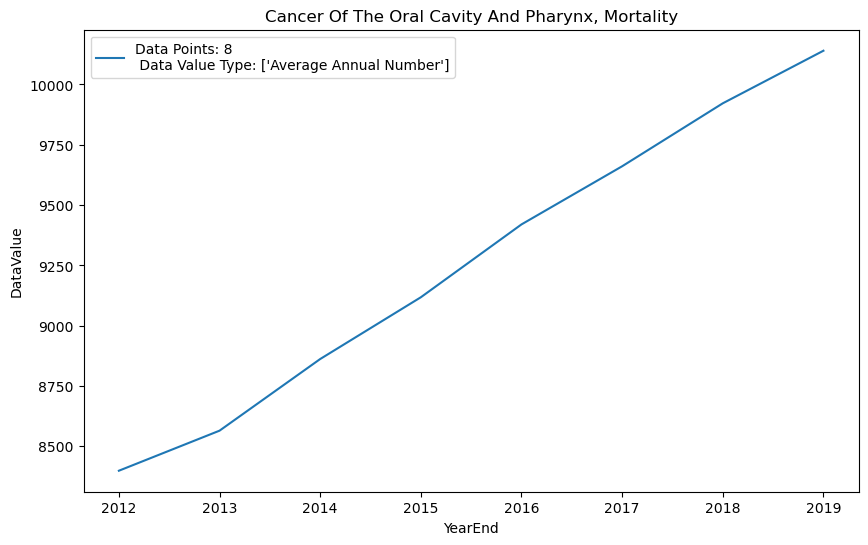

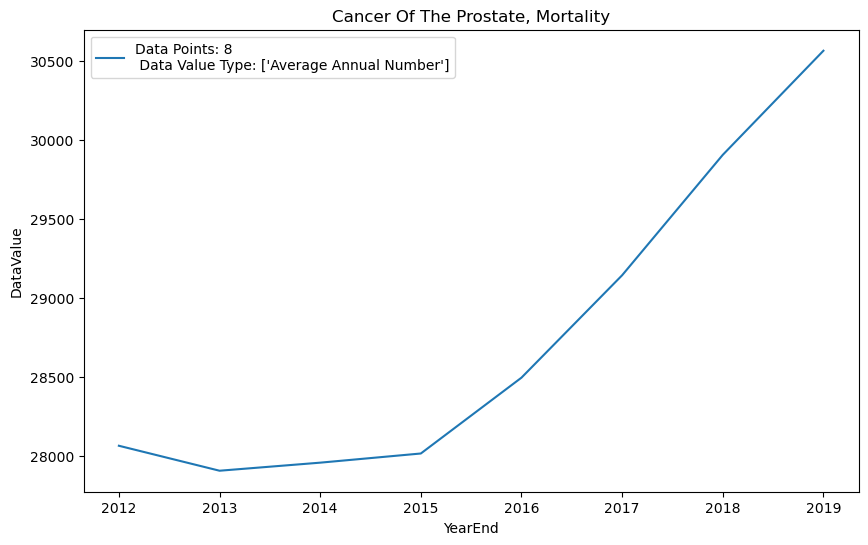

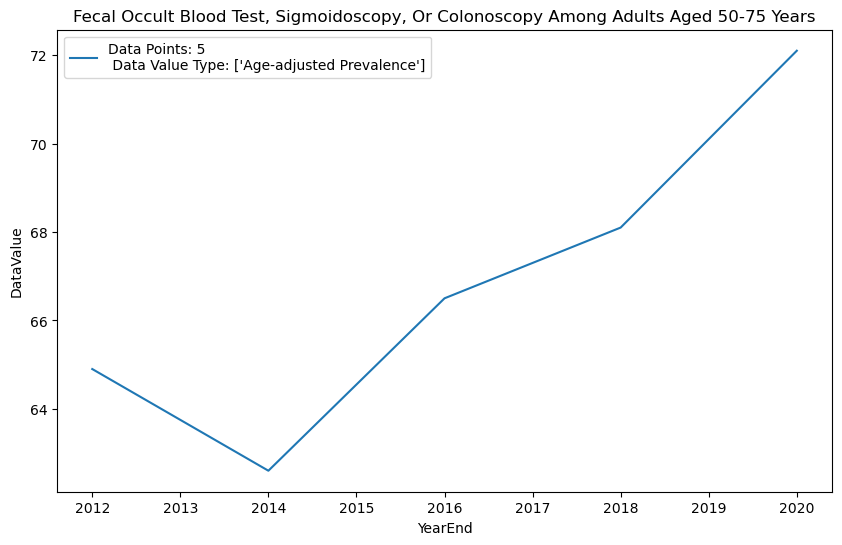

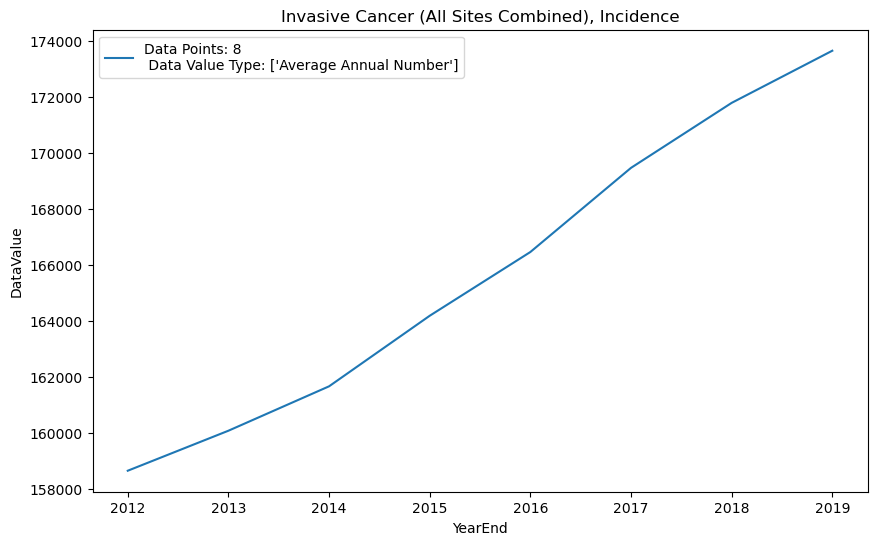

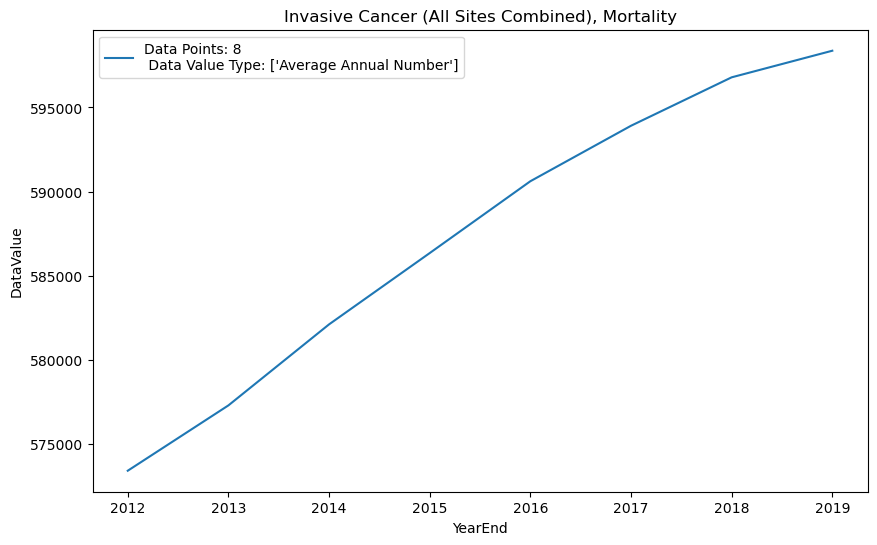

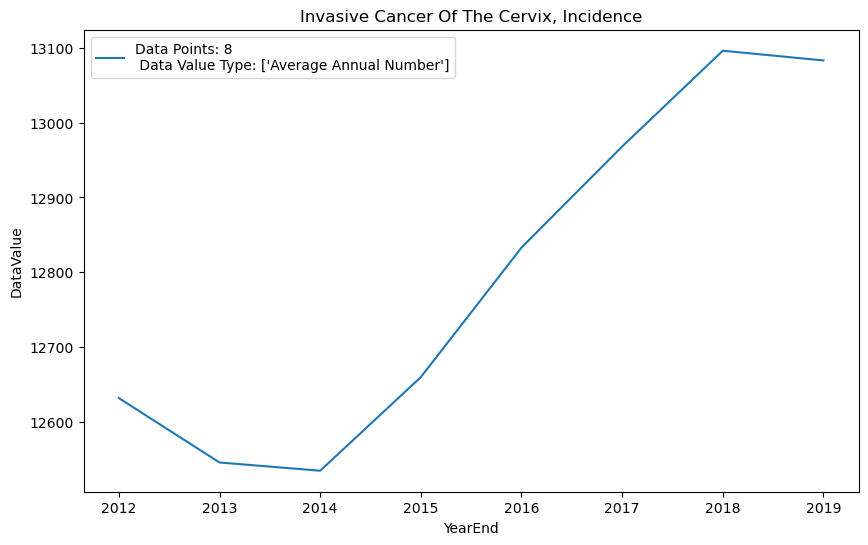

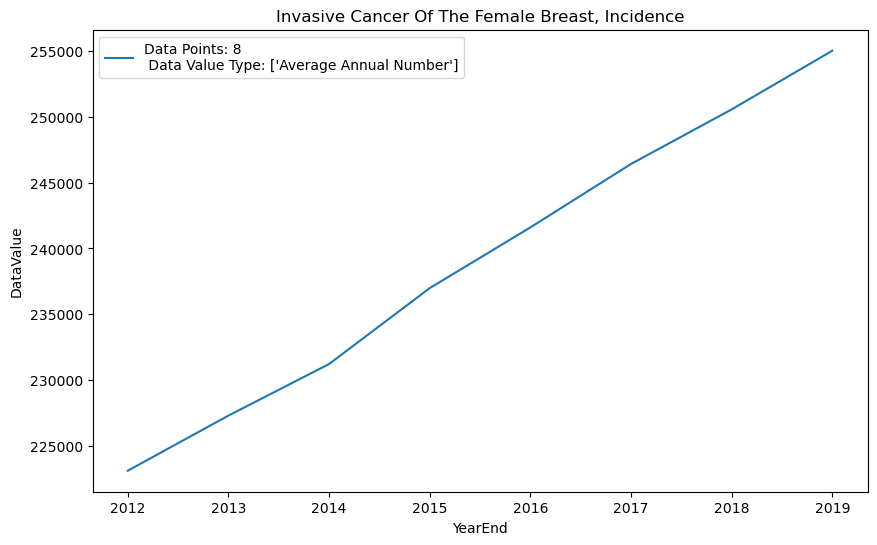

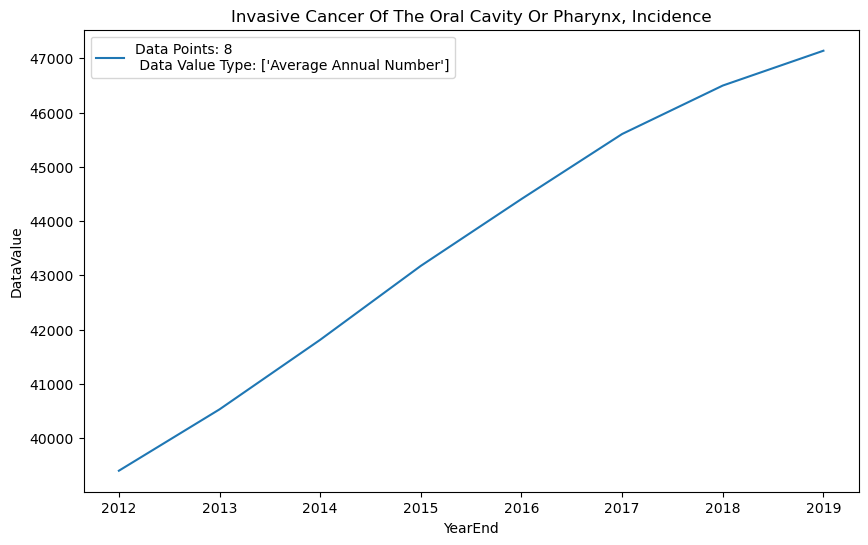

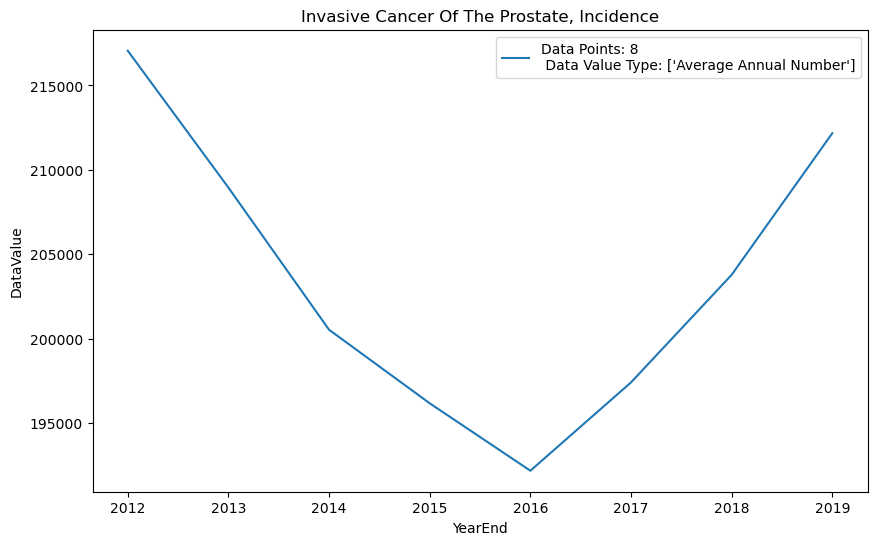

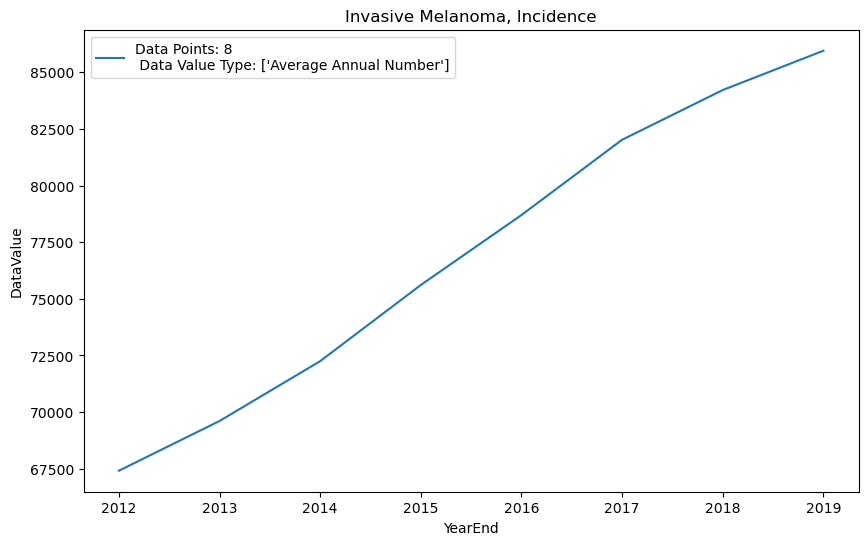

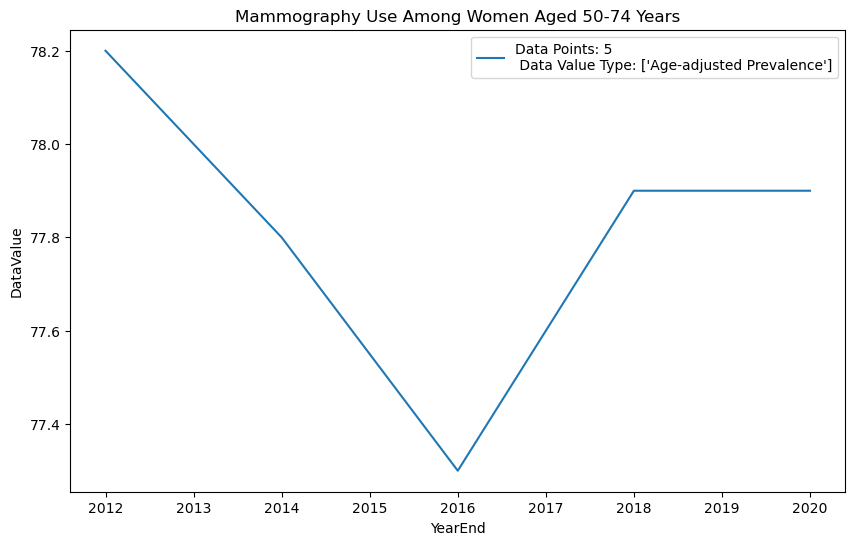

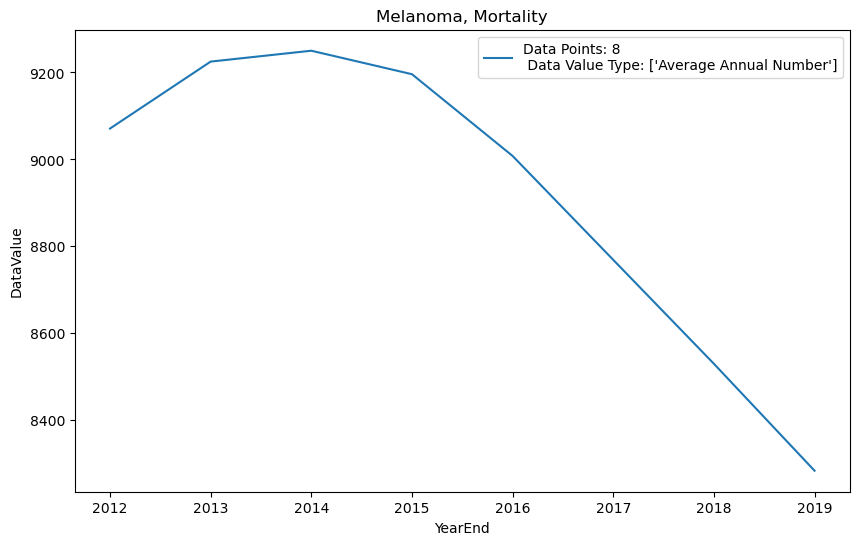

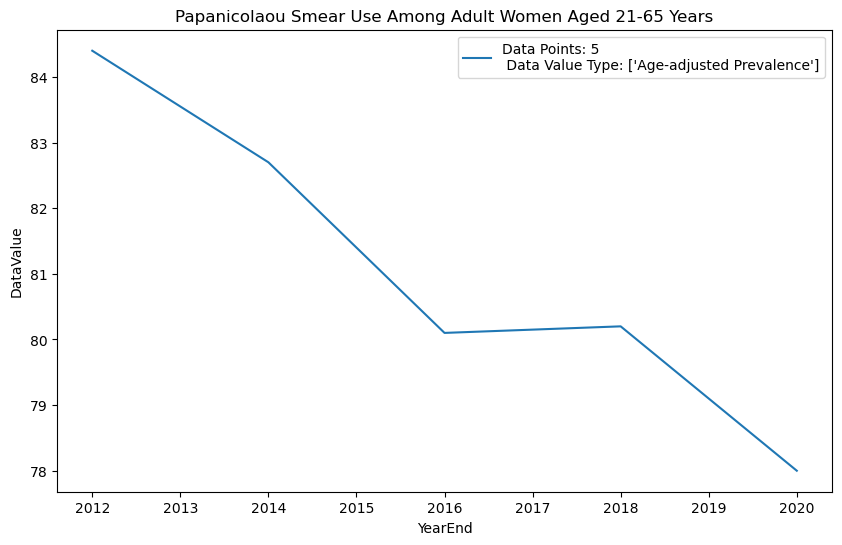

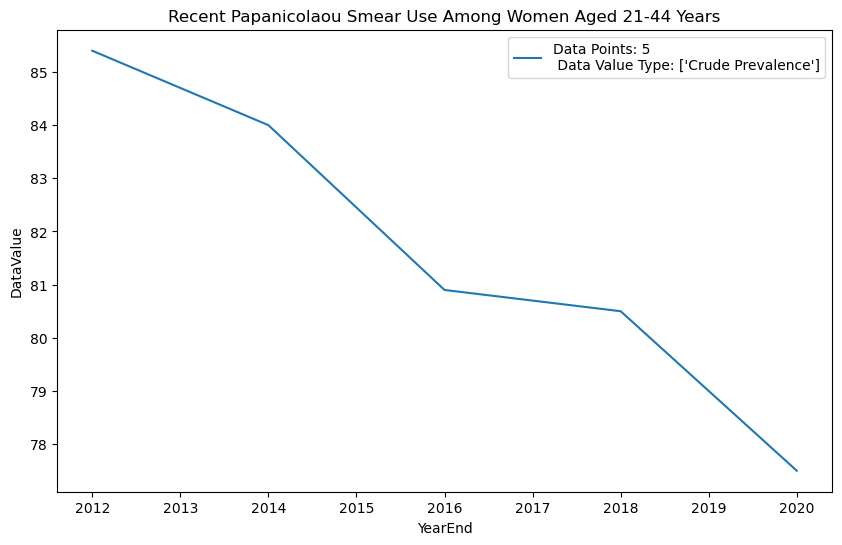

In [14]:
#loops through the dfs dictionary to extract the individual dfs by their 'Question' name and then plot them by yearend and datavalue
for df_name, df in cancer_us_overall.items():
    plt.figure(figsize=(10, 6))
    plt.plot(df['YearEnd'], df['DataValue'], label=f'Data Points: {df["DataValue"].count()}\n Data Value Type: {df["DataValueType"].unique()}')
    plt.xlabel('YearEnd')
    plt.ylabel('DataValue')
    plt.title(df_name.replace('_', ' ').title())
    plt.legend()
    plt.show()